# Project Part 3 - Project Presentation

## Name: James Joko (jjoko)

The purpose of this notebook is to create visuals and takeaways for the project presentation on 12/4 and final report due on 12/11.

For reproducibility, "part_1_common_analysis" must be run first from top to bottom. Once completed, execute each cell in this notebook from top to bottom.

## Setup
Importing packages to visualize data and importing datasets

In [6]:
# importing necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, json, time
from collections import defaultdict
import requests

In [7]:
# importing AQI data
aqi = {}
with open("Intermediate Data/santa_fe_yearly_aqi.json", 'r') as json_file:
    aqi = json.load(json_file)
aqi = pd.DataFrame(list(aqi.items()), columns=['year', 'aqi']).astype({'year': 'int64'})

In [2]:
# import fire polygon data and metadata
fires = []
with open("Intermediate Data/santa_fe_fires.json", 'r') as json_file:
    fires = json.load(json_file)

In [3]:
# importing asthma-related hospital admissions and ED visits
emergency_department_visits = pd.read_csv("Starting Data/asthma_data/asthma_ed_counts.csv").drop("county", axis = 1)
hospital_admissions = pd.read_csv("Starting Data/asthma_data/asthma_hospital_admissions.csv").drop("county", axis = 1)

# Plotting the data from the asthma datasets alone

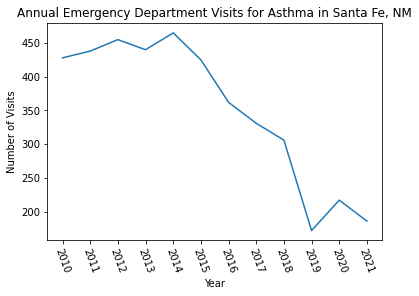

In [12]:
# plotting the Annual Emergency Department Visits for Asthma in Santa Fe, NM
plt.plot(emergency_department_visits["year"], emergency_department_visits["primary_asthma_ed_visit_counts"])
plt.title("Annual Emergency Department Visits for Asthma in Santa Fe, NM")
plt.xticks(emergency_department_visits["year"], rotation=290)
plt.xlabel("Year")
plt.ylabel("Number of Visits")
plt.show()

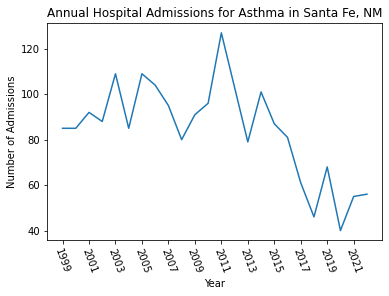

In [13]:
# plotting the Annual Hospital Admissions for Asthma in Santa Fe, NM
plt.plot(hospital_admissions["year"], hospital_admissions["primary_asthma_hospital_admissions"])
plt.title("Annual Hospital Admissions for Asthma in Santa Fe, NM")
plt.xticks(range(hospital_admissions["year"][0], hospital_admissions["year"].iloc[-1], 2), rotation=290)
plt.xlabel("Year")
plt.ylabel("Number of Admissions")
plt.show()

# Replotting two of the visualizations from Project Part 1

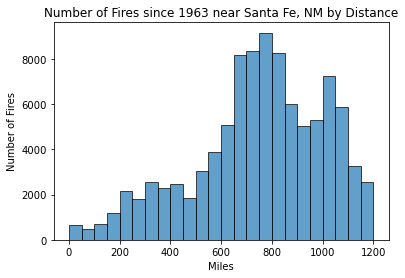

In [14]:
# obtain a list of only the distance from fires to Santa Fe
distances = [feature['attributes']['Distance_to_SF'] for feature in fires]
year_buckets = range(0, 1250, 50)

# plot histogram of fire distances for each bucket of 50 miles from 0 to 1250 miles from Santa Fe, NM
plt.hist(distances, bins = year_buckets, edgecolor='black', alpha=0.7)
plt.xlabel('Miles')
plt.ylabel('Number of Fires')
plt.title('Number of Fires since 1963 near Santa Fe, NM by Distance')
plt.show()

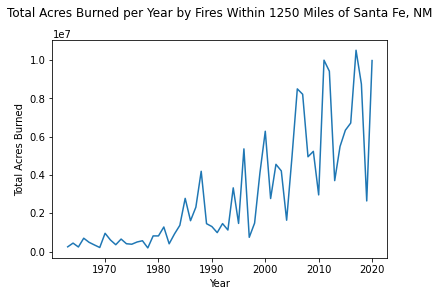

In [15]:
# Build a dictionary that sums the acres burned per year by iterating through all fires and adding GIS_acres to each year key.
from collections import defaultdict
acreage_by_year = defaultdict(float)
for feature in fires:
    acreage_by_year[feature['attributes']['Fire_Year']] += feature['attributes']['GIS_Acres']

# plot total acres burned per year with dictionary keys (year) as x axis and total GIS_acres as y-axis
plt.plot(list(acreage_by_year.keys()), list(acreage_by_year.values()))
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.title('Total Acres Burned per Year by Fires Within 1250 Miles of Santa Fe, NM', y=1.08)
plt.show()

# Plotting the distance rings centered around Santa Fe on a map of the United States to show where a majority of fires around Santa Fe occur

In [16]:
# import mapping library
import folium

# define santa fe to center circles around  
santa_fe_coords = [35.6869, -105.9378]

# Create a map initially centered around Santa Fe
m = folium.Map(location=santa_fe_coords, zoom_start=7)

# Add a circle with a radius of 200, 400, 600, 800, 1000, and 1200 miles around Santa Fe. Make the circles where a majority of fires happen red and otherwise green
for radius, col in zip([200, 400, 600, 800, 1000, 1200], ['green', 'green', 'green', 'red', 'red', 'red']):
    folium.Circle(location=santa_fe_coords, radius=radius * 1609.34, color=col, fill=False).add_to(m)

# Save the map to an HTML file for viewing
m.save('santa_fe_circle_map.html')

# Performing correlation tests and visualizations to present in final presentation and findings section of final report

In [8]:
# create a full dataframe with all data loaded where each row is a year
df = pd.read_csv("Intermediate Data/annual_smoke_estimate.csv")
df = df.merge(emergency_department_visits, 'left', 'year').merge(hospital_admissions, 'left', 'year').merge(aqi, 'left', 'year')

0.14285714285714288
0.7871720116618075


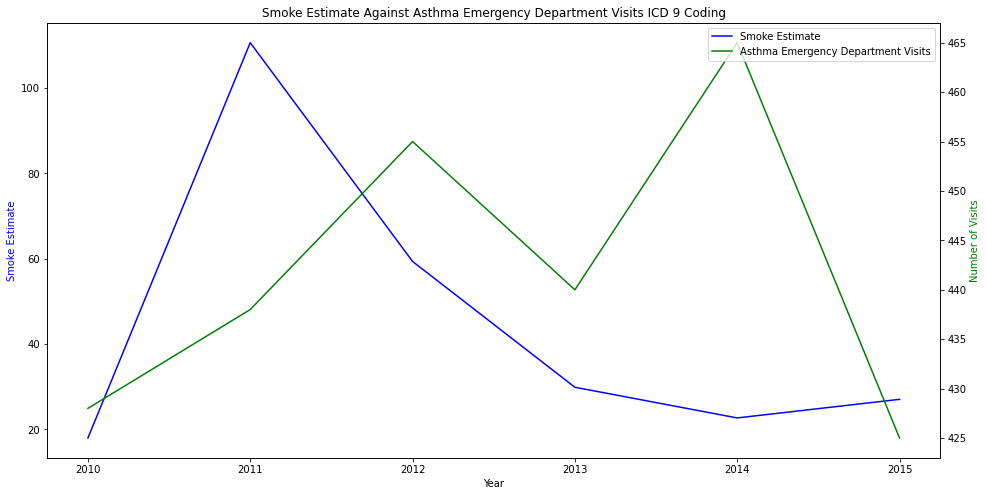

In [49]:
# import library to calculate correlation
import scipy.stats

# create a subset that only contains only year, smoke estimate, and asthma ED visits and only rows that do not contain missing values.
# additionally, only include years where the ICD 9 coding was in effect
subset = df[["year", "smoke_estimate", "primary_asthma_ed_visit_counts"]].dropna(axis = 0)
subset = subset.loc[subset["year"] <= 2015]

# calculate a spearman correlation coefficient between smoke estimate and asthma ED visits
correlation_coefficient, p_value = scipy.stats.spearmanr(subset.iloc[:, 1], subset.iloc[:, 2])
print(correlation_coefficient)
print(p_value)

# create dual axis plot showing smoke estimate and asthma ED visits
fig, ax1 = plt.subplots(figsize = (16, 8))
ax1.plot(subset['year'], subset['smoke_estimate'], color='blue', label='Smoke Estimate')
ax2 = ax1.twinx()
ax2.plot(subset['year'], subset['primary_asthma_ed_visit_counts'], color='green', label='Asthma Emergency Department Visits')

# set labels, legend, and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax2.set_ylabel('Number of Visits', color='green')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.title("Smoke Estimate Against Asthma Emergency Department Visits ICD 9 Coding")
plt.show()

0.3
0.6238376647810728


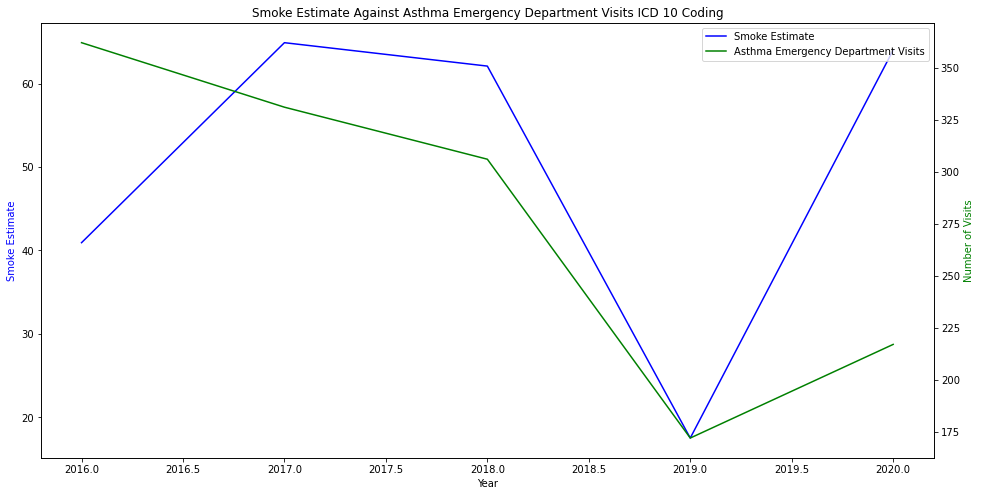

In [48]:
# import library to calculate correlation
import scipy.stats

# create a subset that only contains only year, smoke estimate, and asthma ED visits and only rows that do not contain missing values
subset = df[["year", "smoke_estimate", "primary_asthma_ed_visit_counts"]].dropna(axis = 0)
# additionally, only include years where the ICD 10 coding was in effect
subset = subset.loc[subset["year"] > 2015]

# calculate a spearman correlation coefficient between smoke estimate and asthma ED visits
correlation_coefficient, p_value = scipy.stats.spearmanr(subset.iloc[:, 1], subset.iloc[:, 2])
print(correlation_coefficient)
print(p_value)

# create dual axis plot showing smoke estimate and asthma ED visits
fig, ax1 = plt.subplots(figsize = (16, 8))
ax1.plot(subset['year'], subset['smoke_estimate'], color='blue', label='Smoke Estimate')
ax2 = ax1.twinx()
ax2.plot(subset['year'], subset['primary_asthma_ed_visit_counts'], color='green', label='Asthma Emergency Department Visits')

# set labels, legend, and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax2.set_ylabel('Number of Visits', color='green')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.title("Smoke Estimate Against Asthma Emergency Department Visits ICD 10 Coding")
plt.show()

0.2950229051153235
0.2503193417519162


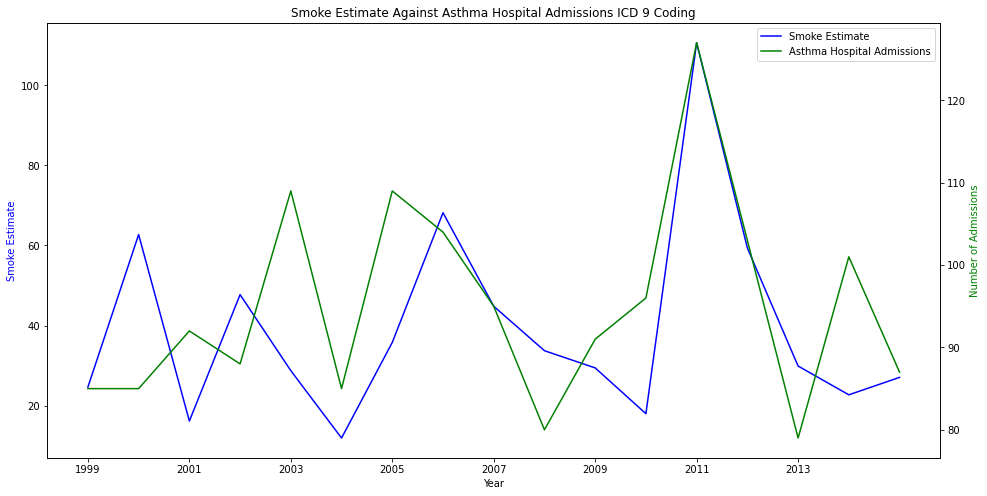

In [46]:
# create a subset that only contains only year, smoke estimate, and asthma hospital admissions and only rows that do not contain missing values
subset = df[["year", "smoke_estimate", "primary_asthma_hospital_admissions"]].dropna(axis = 0)
# additionally, only include years where the ICD 9 coding was in effect
subset = subset.loc[subset["year"] <= 2015]

# calculate a spearman correlation coefficient between smoke estimate and asthma ED visits
correlation_coefficient, p_value = scipy.stats.spearmanr(subset.iloc[:, 1], subset.iloc[:, 2])
print(correlation_coefficient)
print(p_value)

# create dual axis plot showing smoke estimate and asthma hospital admissions
fig, ax1 = plt.subplots(figsize = (16, 8))
ax1.plot(subset['year'], subset['smoke_estimate'], color='blue', label='Smoke Estimate')
ax2 = ax1.twinx()
ax2.plot(subset['year'], subset['primary_asthma_hospital_admissions'], color='green', label='Asthma Hospital Admissions')

# set labels, legend, and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax2.set_ylabel('Number of Admissions', color='green')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.xticks(range(subset["year"].iloc[0], subset["year"].iloc[-1], 2))
plt.title("Smoke Estimate Against Asthma Hospital Admissions ICD 9 Coding")
plt.show()

-0.6
0.28475697986529375


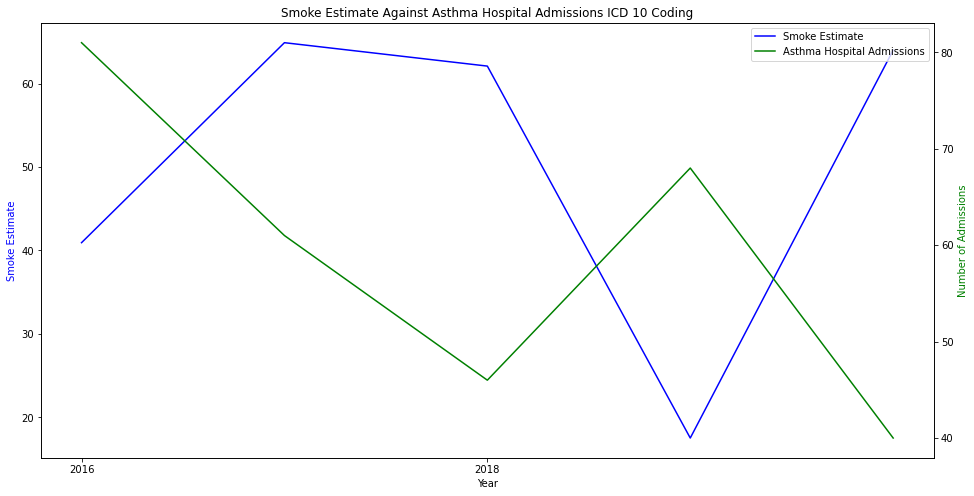

In [52]:
# create a subset that only contains only year, smoke estimate, and asthma hospital admissions and only rows that do not contain missing values
subset = df[["year", "smoke_estimate", "primary_asthma_hospital_admissions"]].dropna(axis = 0)
# additionally, only include years where the ICD 10 coding was in effect
subset = subset.loc[subset["year"] > 2015]

# calculate a spearman correlation coefficient between smoke estimate and asthma ED visits
correlation_coefficient, p_value = scipy.stats.spearmanr(subset.iloc[:, 1], subset.iloc[:, 2])
print(correlation_coefficient)
print(p_value)

# create dual axis plot showing smoke estimate and asthma hospital admissions
fig, ax1 = plt.subplots(figsize = (16, 8))
ax1.plot(subset['year'], subset['smoke_estimate'], color='blue', label='Smoke Estimate')
ax2 = ax1.twinx()
ax2.plot(subset['year'], subset['primary_asthma_hospital_admissions'], color='green', label='Asthma Hospital Admissions')

# set labels, legend, and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Smoke Estimate', color='blue')
ax2.set_ylabel('Number of Admissions', color='green')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.xticks(range(subset["year"].iloc[0], subset["year"].iloc[-1], 2))
plt.title("Smoke Estimate Against Asthma Hospital Admissions ICD 10 Coding")
plt.show()

# Plotting the timelines of all datasets in the project to visualize data limitations

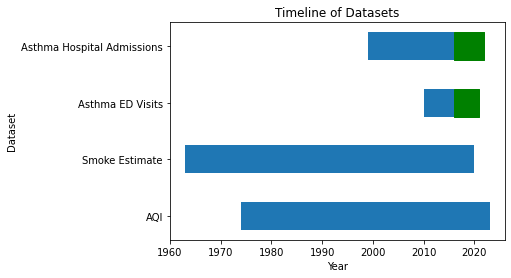

In [32]:
# create blank figure
fig, ax = plt.subplots()

# Plot timeline bars for each dataset to demonstrate insufficient years of data
ax.broken_barh([(aqi["year"].iloc[0], aqi["year"].iloc[-1] - aqi["year"].iloc[0])], (0, 0.5))
smoke_estimate_years = list(df["year"])
ax.broken_barh([(smoke_estimate_years[0], smoke_estimate_years[-1] - smoke_estimate_years[0])], (1, 0.5))
ax.broken_barh([(emergency_department_visits["year"].iloc[0], 2016 - emergency_department_visits["year"].iloc[0])], (2, 0.5))
ax.broken_barh([(2016, emergency_department_visits["year"].iloc[-1] - 2016)], (2, 0.5), color="green")
ax.broken_barh([(hospital_admissions["year"].iloc[0], 2016 - hospital_admissions["year"].iloc[0])], (3, 0.5))
ax.broken_barh([(2016, hospital_admissions["year"].iloc[-1] - 2016)], (3, 0.5), color="green")

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Dataset')
ax.set_title('Timeline of Datasets')
ax.set_yticks([0.25, 1.25, 2.25, 3.25])
ax.set_yticklabels(["AQI", "Smoke Estimate", "Asthma ED Visits", "Asthma Hospital Admissions"])
plt.yticks()
plt.show()

# Fitting a linear model to predict asthma hospital admissions

In [24]:
# create a subset that only contains only year, smoke estimate, and asthma hospital admissions and only rows that do not contain missing values
subset = df[["year", "smoke_estimate", "primary_asthma_hospital_admissions"]].dropna(axis = 0)
# additionally, only include years where the ICD 10 coding was in effect
subset = subset.loc[subset["year"] > 2015]

# load library
from sklearn.linear_model import LinearRegression

# create and fit model
model = LinearRegression()
y = subset["primary_asthma_hospital_admissions"]
X = subset.drop("primary_asthma_hospital_admissions", axis = 1)
model.fit(X, y)

print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model coefficients: [-7.5641519  -0.52565244]
Model intercept: 15349.883735708676


# Fitting a linear model to predict asthma ED visits

In [25]:
# create a subset that only contains only year, smoke estimate, and asthma hospital admissions and only rows that do not contain missing values
subset = df[["year", "smoke_estimate", "primary_asthma_ed_visit_counts"]].dropna(axis = 0)
# additionally, only include years where the ICD 10 coding was in effect
subset = subset.loc[subset["year"] > 2015]

# load library
from sklearn.linear_model import LinearRegression

# create and fit model
model = LinearRegression()
y = subset["primary_asthma_ed_visit_counts"]
X = subset.drop("primary_asthma_ed_visit_counts", axis = 1)
model.fit(X, y)

print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model coefficients: [-44.69203729   1.70401993]
Model intercept: 90381.11635498168


In [26]:
model.

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}